# Load Library & Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('data/train.csv')

# no of rows and columns of the data
print(data.shape)

# display the first 5 rows
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The house price dataset contains 1460 rows and 81 columns

# Data Analysis

## Missing Values

In [7]:
cols_with_na = [col for col in data.columns if data[col].isna().sum() >= 1]

# print the column name and the percentage of missing values
for col in cols_with_na:
    print('{} column : {:.2f}% missing values'.format(col, data[col].isna().sum()/data.shape[0]))

LotFrontage column : 0.18% missing values
Alley column : 0.94% missing values
MasVnrType column : 0.01% missing values
MasVnrArea column : 0.01% missing values
BsmtQual column : 0.03% missing values
BsmtCond column : 0.03% missing values
BsmtExposure column : 0.03% missing values
BsmtFinType1 column : 0.03% missing values
BsmtFinType2 column : 0.03% missing values
Electrical column : 0.00% missing values
FireplaceQu column : 0.47% missing values
GarageType column : 0.06% missing values
GarageYrBlt column : 0.06% missing values
GarageFinish column : 0.06% missing values
GarageQual column : 0.06% missing values
GarageCond column : 0.06% missing values
PoolQC column : 1.00% missing values
Fence column : 0.81% missing values
MiscFeature column : 0.96% missing values


In [8]:
data.Electrical.isna().sum()

1

### Check the relationship between missing values and Sale Price

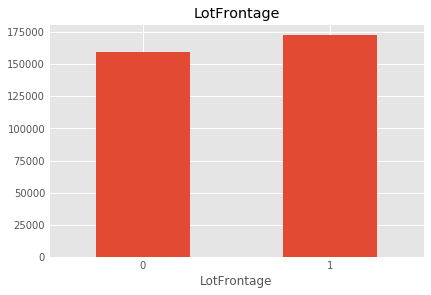

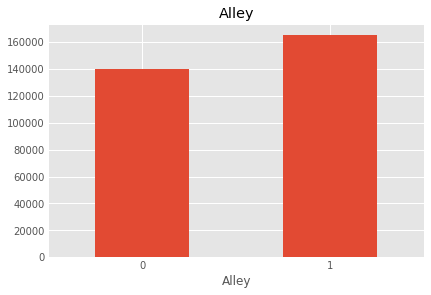

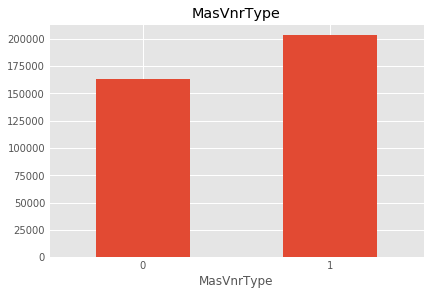

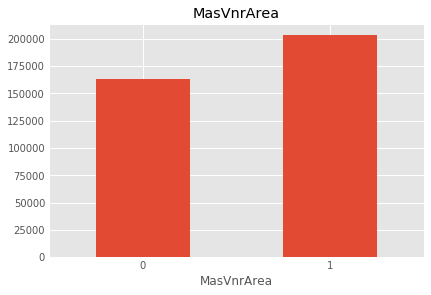

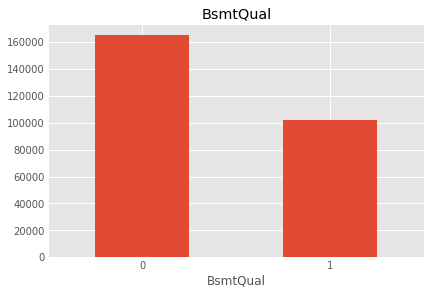

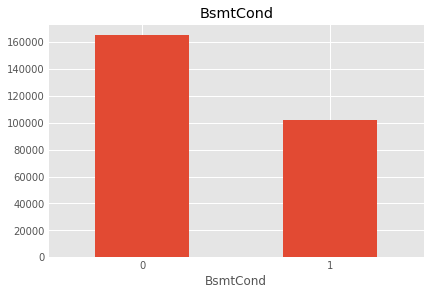

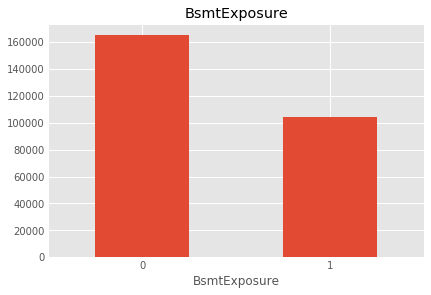

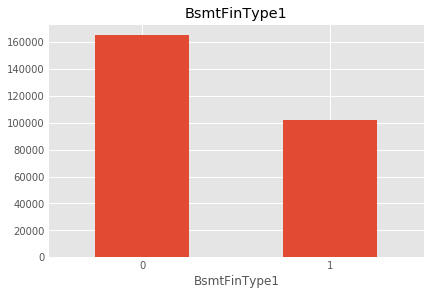

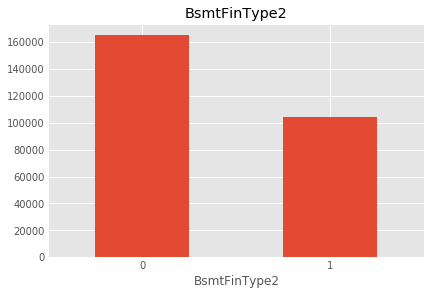

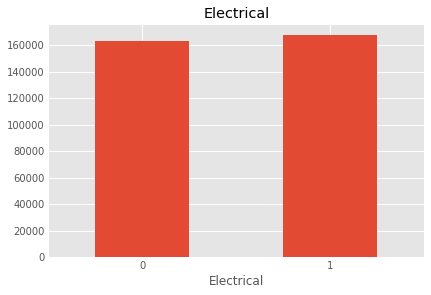

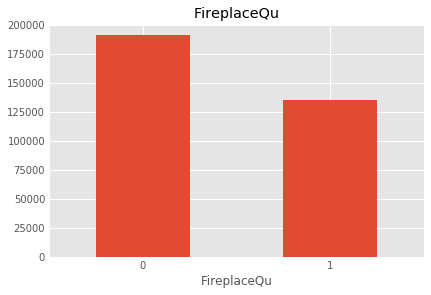

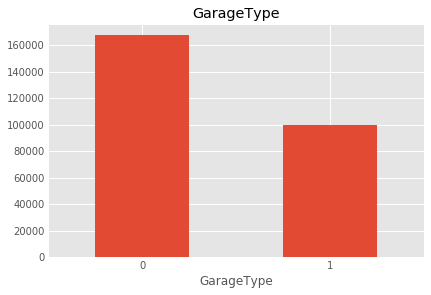

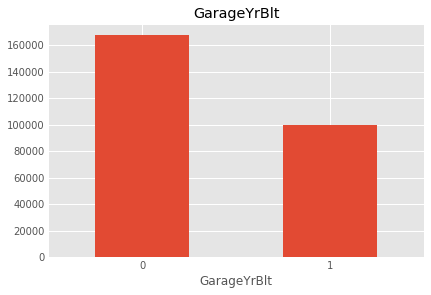

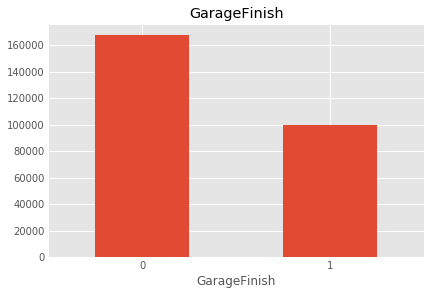

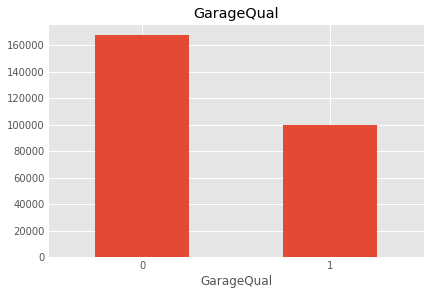

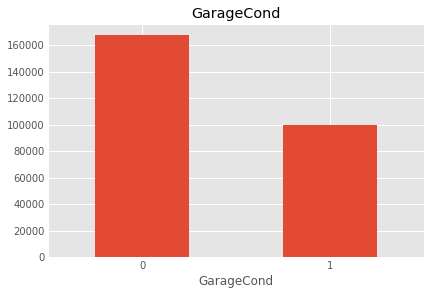

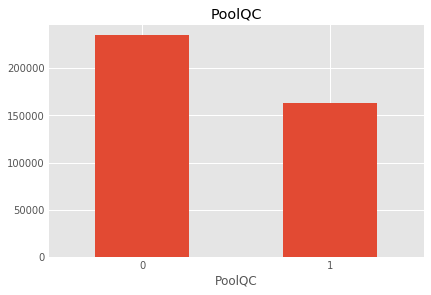

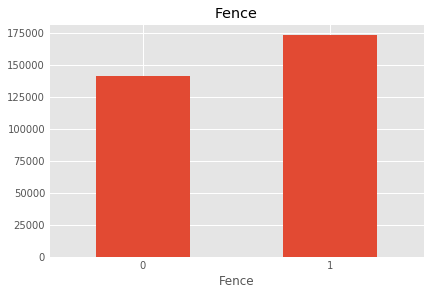

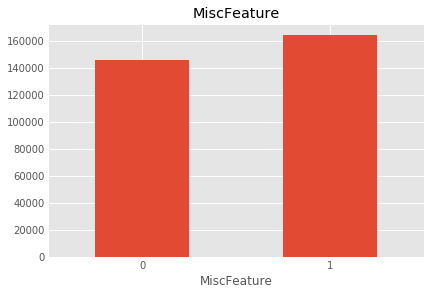

In [13]:
plt.style.use('ggplot')

def analyze_na(df, col):
    df = df.copy()
    
    # indicates 1 if the observation was missing or zero otherwise
    df[col] = np.where(df[col].isnull(), 1, 0)
    
    # calculate the median SalePrice where the information is missing or present
    df.groupby(col)['SalePrice'].median().plot.bar(rot=0)
    plt.title(col)
    plt.show()

for col in cols_with_na:
    analyse_na(data, col)

## Numerical Columns

In [15]:
# list of numerical columns
num_cols = [col for col in data.columns if data[col].dtypes != 'O']

print('Number of numerical columns: ', len(num_cols))

# display the num columns data
data[num_cols].head()

Number of numerical columns:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Columns

Notice that there are 4 year variables. Let's look into them

In [16]:
# List of columns that contain year information
year_cols = [col for col in data.columns if 'Yr' in col or 'Year' in col]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
# Explore the content of the year columns
for col in year_cols:
    print(col, data[col].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Text(0.5, 1.0, 'Change in House Price over the years')

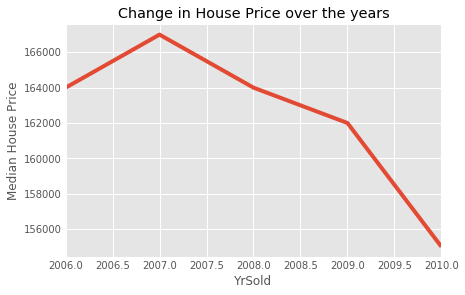

In [19]:
# Explore the evolution of the sale price over the years
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House Price over the years')

Looks like there has been a drop in the value of the houses, which is unusual. Let's explore more

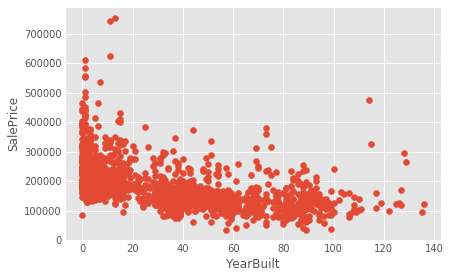

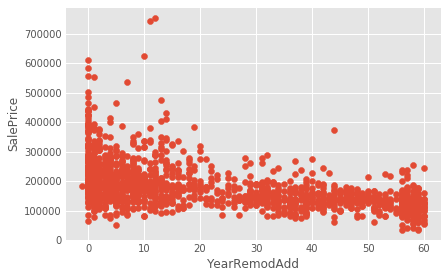

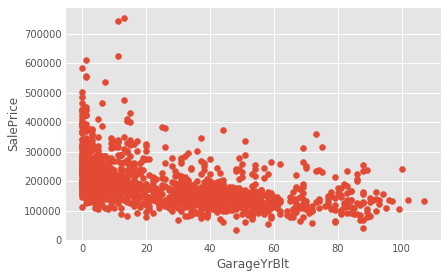

In [20]:
# Explore the relationship between the year variables and the house price
def analyze_year(df, col):
    df = df.copy()
    
    # difference between the year var and year sold
    df[col] = df['YrSold'] - df[col]
    
    plt.scatter(df[col], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(col)
    plt.show()
    
for col in year_cols:
    if col != 'YrSold':
        analyze_year(data, col)

We can see that there's a tendency of a decrease in price for older house.

## Discrete Columns

In [23]:
# List the discrete columns
discrete_cols = [col for col in num_cols if len(data[col].unique()) < 20 and col not in year_cols + ['Id']]
len(discrete_cols)

14

In [24]:
data[discrete_cols].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


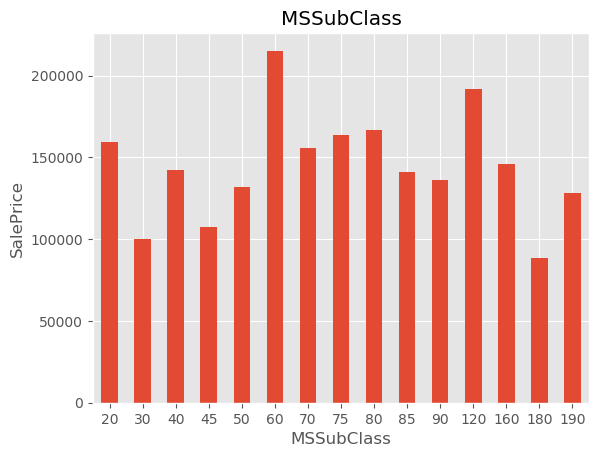

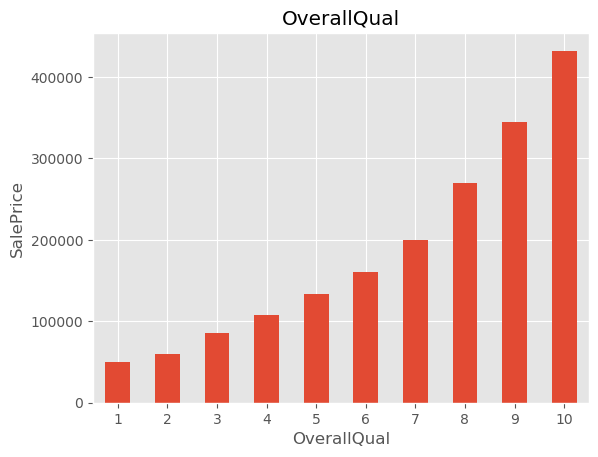

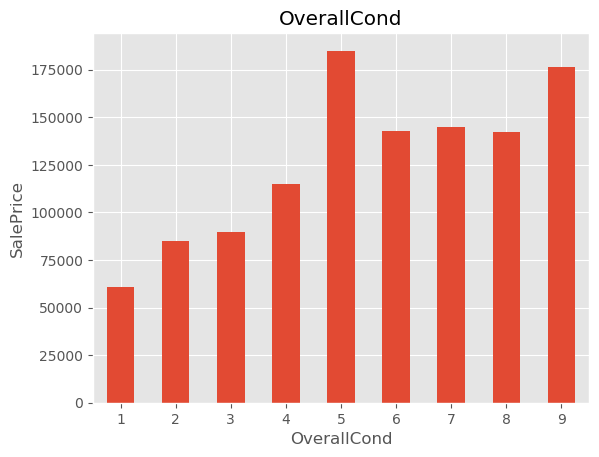

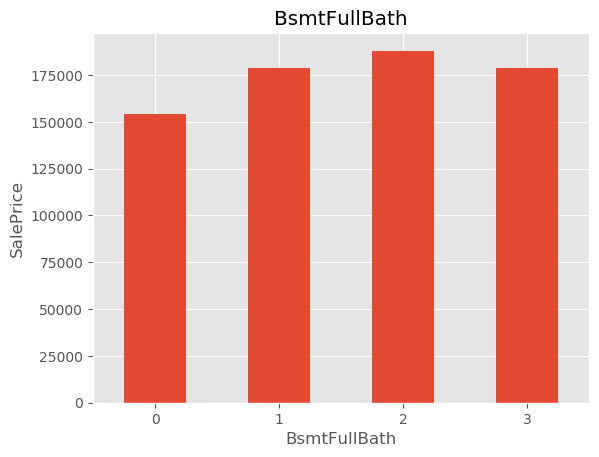

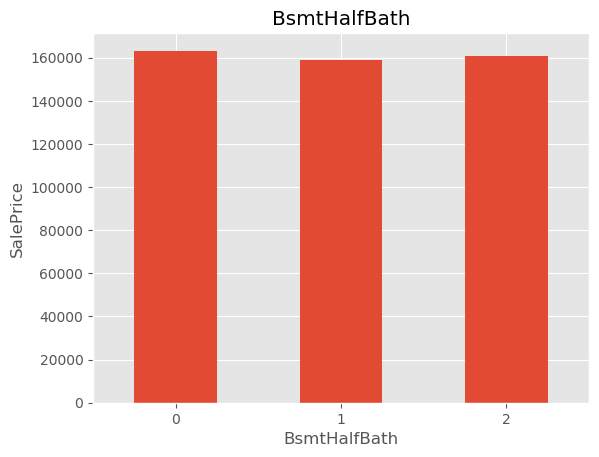

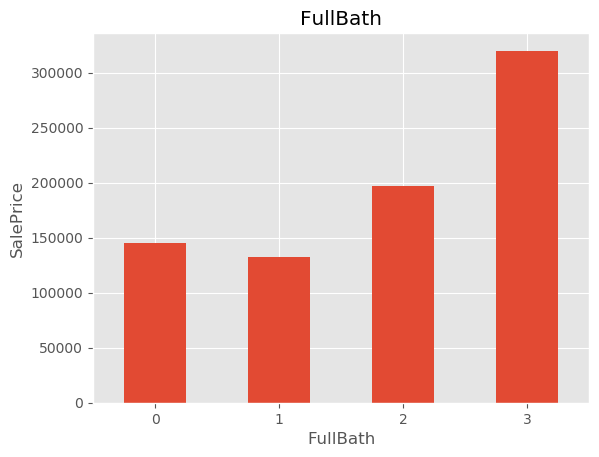

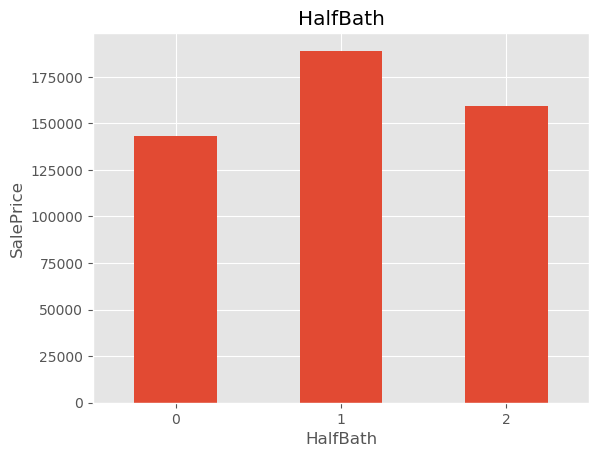

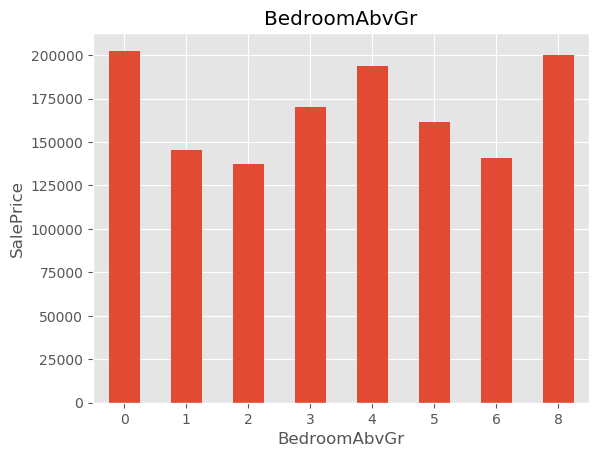

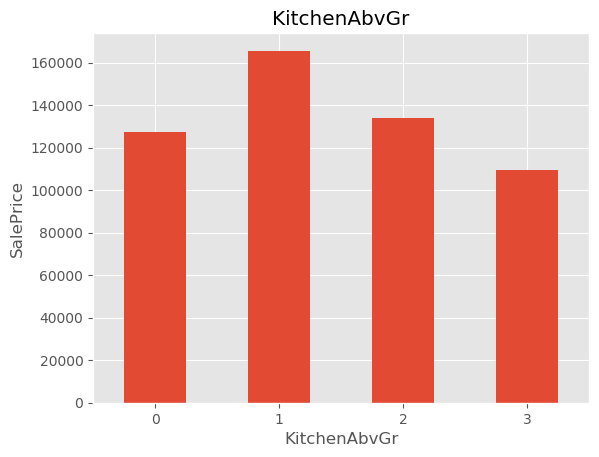

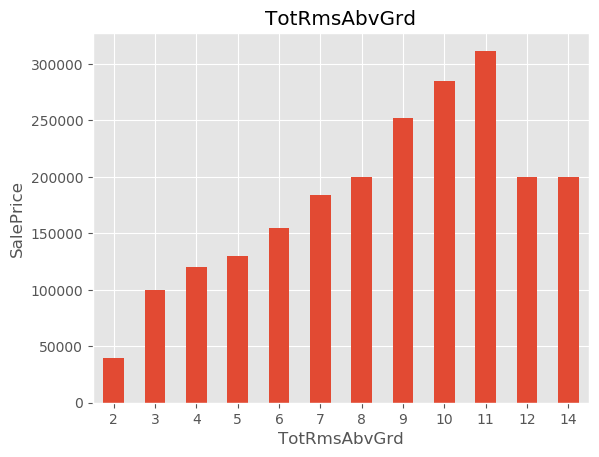

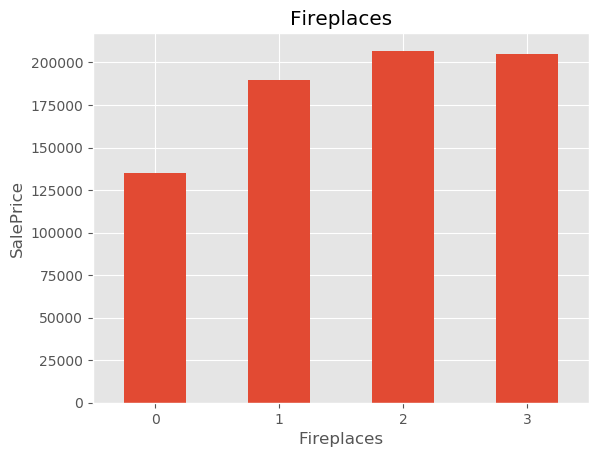

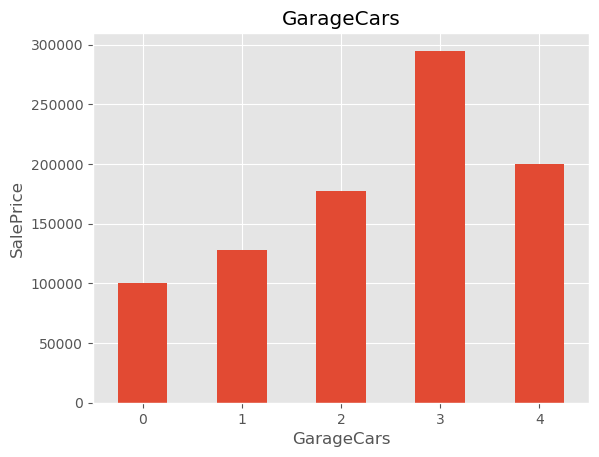

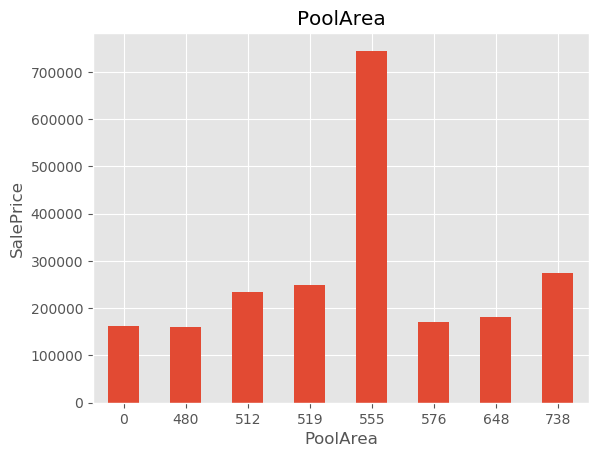

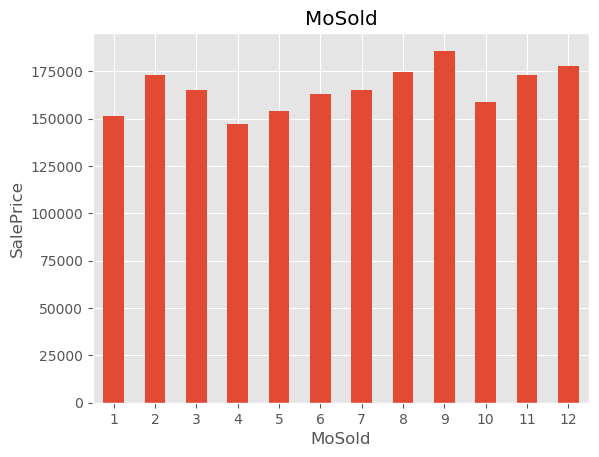

In [33]:
def analyze_discrete(df, col):
    df = df.copy()
    df.groupby(col)['SalePrice'].median().plot.bar(rot=0)
    plt.title(col)
    plt.ylabel('SalePrice')
    plt.show()
    
for col in discrete_cols:
    analyze_discrete(data, col)

## Continuous Columns

In [35]:
# list of continuous columns
cont_cols = [col for col in num_cols if col not in year_cols + discrete_cols + ['Id']]
len(cont_cols)

19

In [36]:
data[cont_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


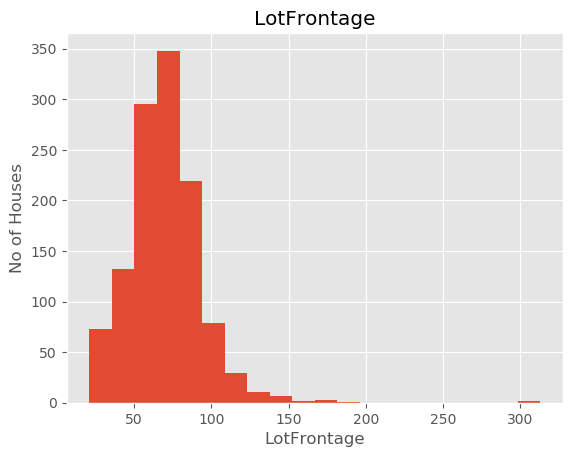

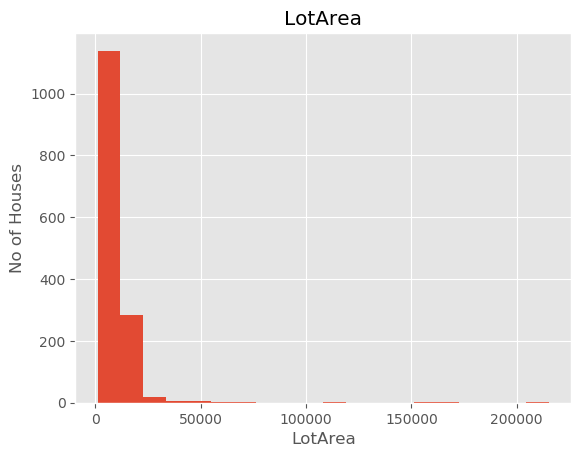

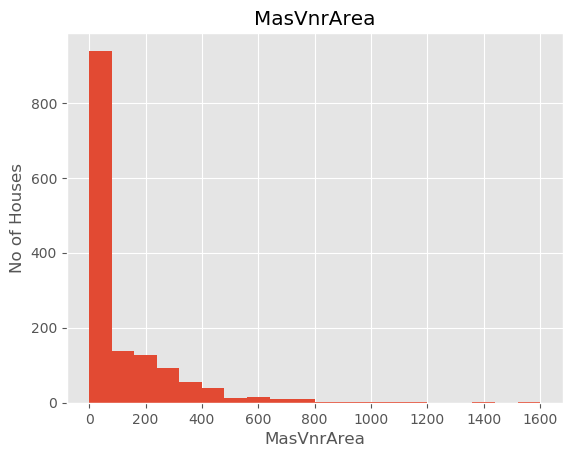

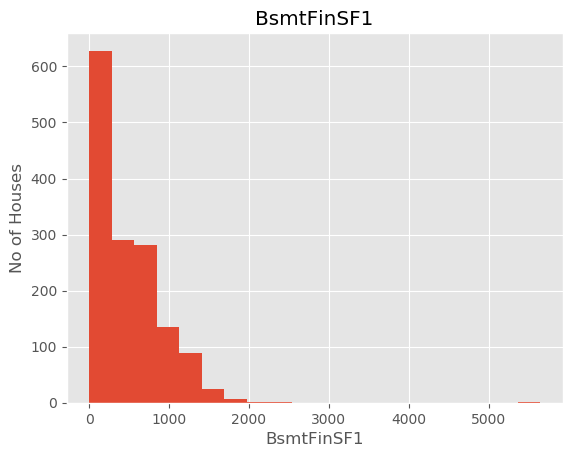

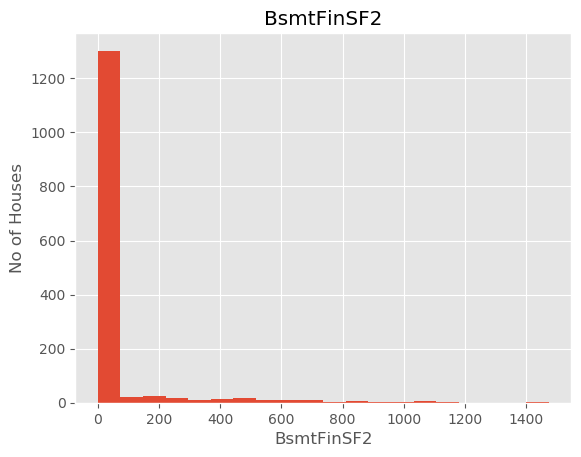

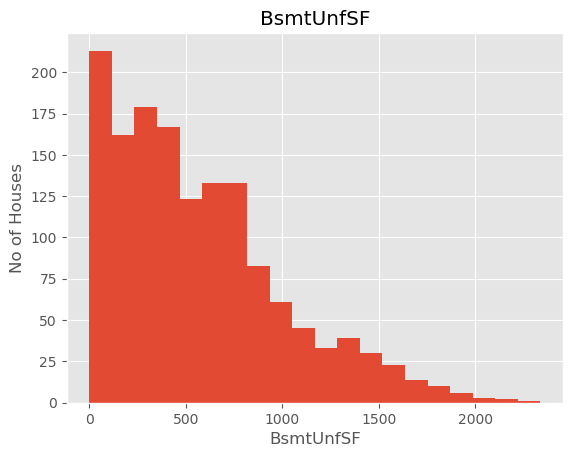

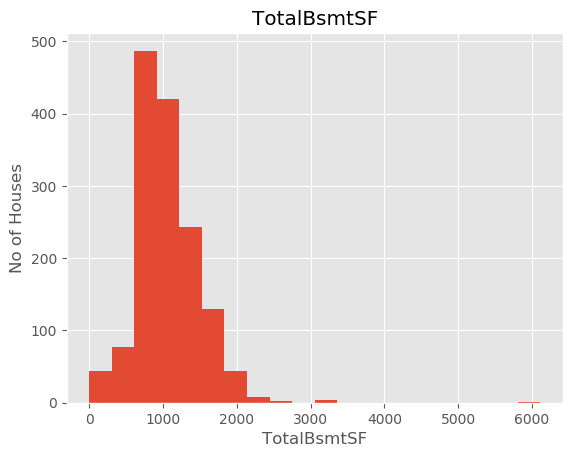

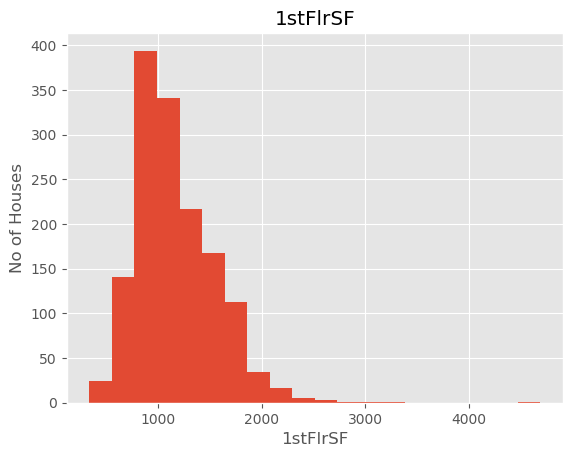

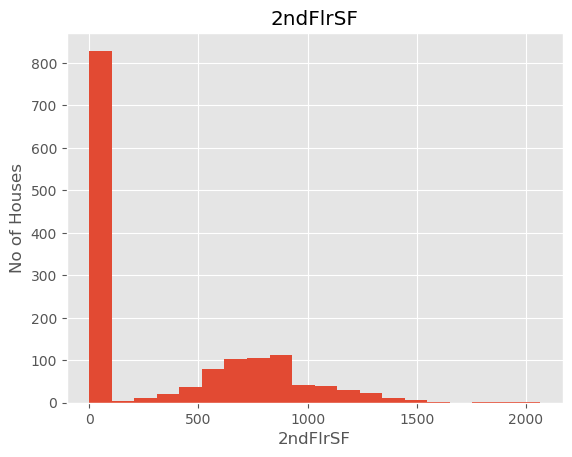

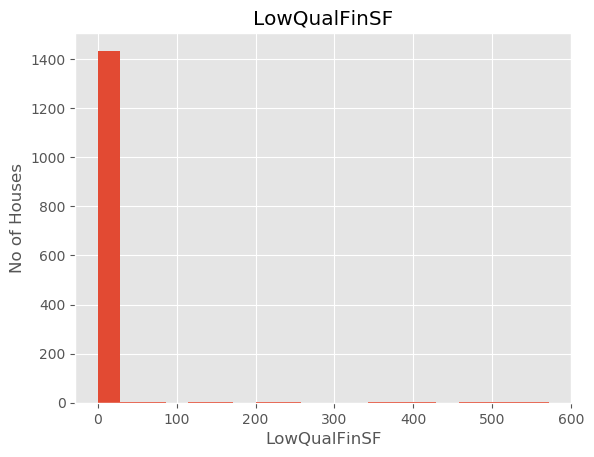

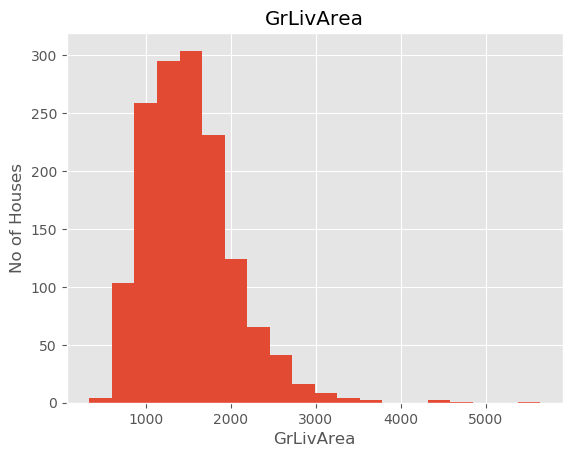

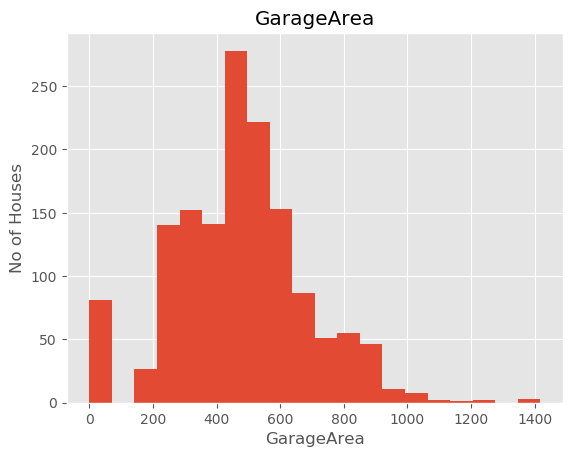

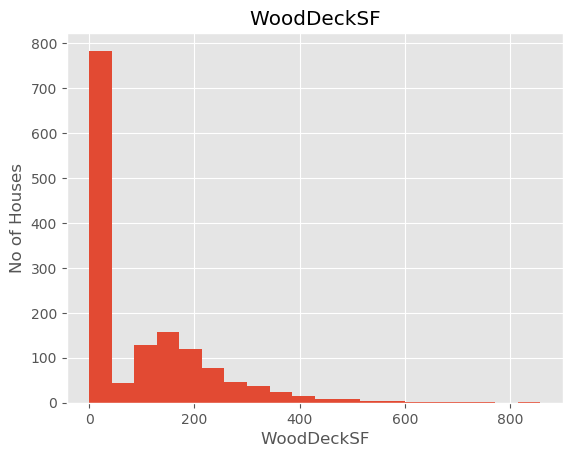

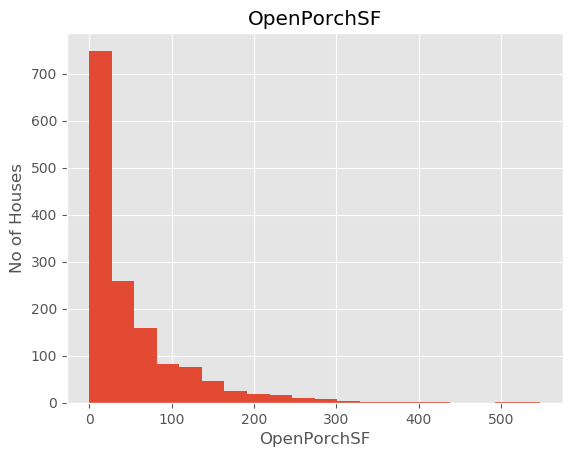

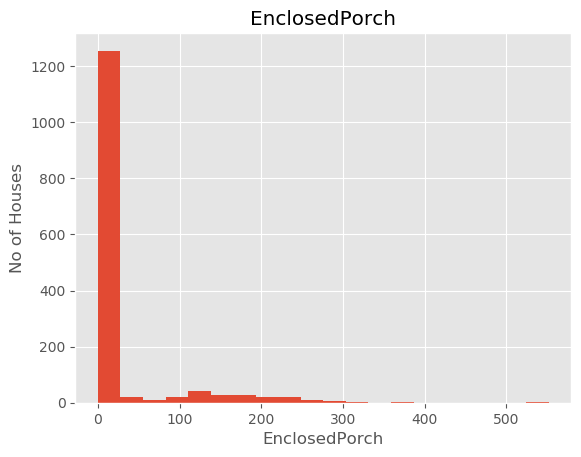

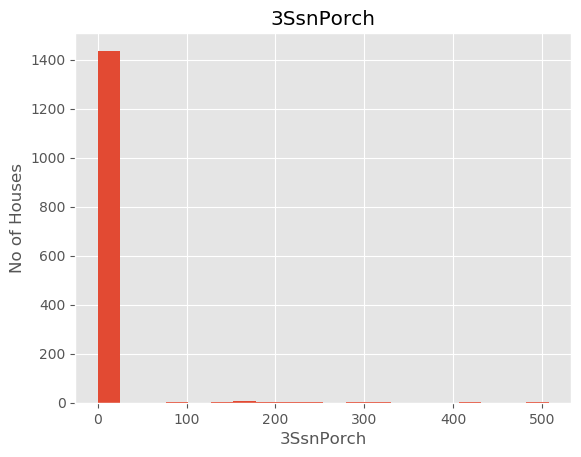

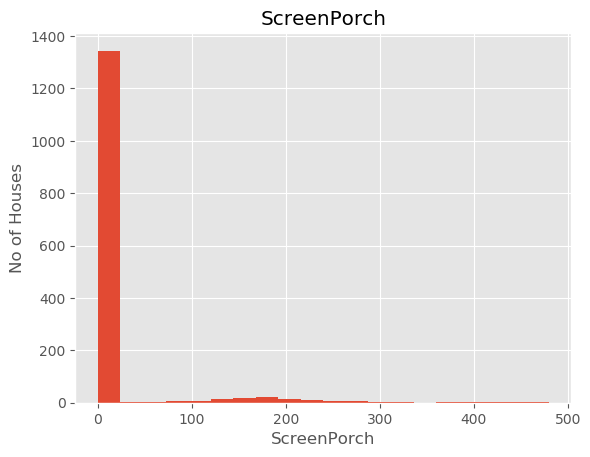

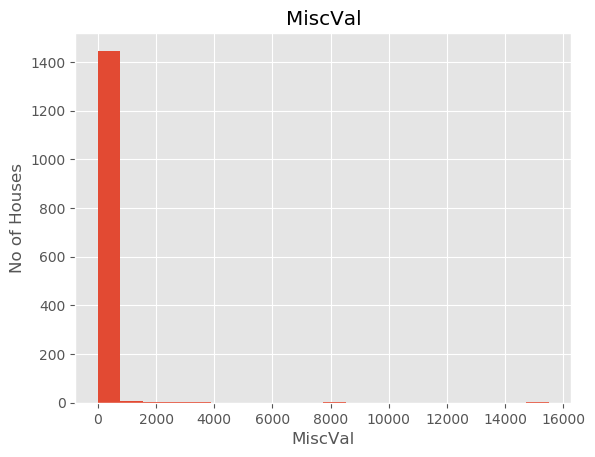

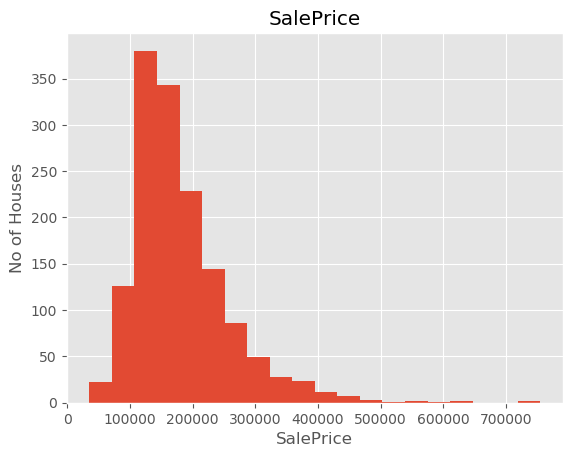

In [37]:
def analyze_cont(df, col):
    df = df.copy()
    df[col].hist(bins=20)
    plt.ylabel('No of Houses')
    plt.xlabel(col)
    plt.title(col)
    plt.show()
    
for col in cont_cols:
    analyze_cont(data, col)